In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
#import pyfits
import glob
import struct

from sn import *

import os
#import statistics
from sklearn.cluster import KMeans
import FATS
from sklearn import decomposition

In [12]:
hsv = plt.get_cmap('hsv')
hsv(float(i)/(k-1))


(1.0, 0.0, 0.0, 1.0)

In [23]:

def moyenne(tab):
	return sum(tab)/len(tab)

def mediane(tab):
	return statistics.median(tab)


def formaterCarac(tab,index):
	liste=[]
	for i in range(0,len(tab)):
		liste.append(tab[i][index])
	return liste


compteur=0


os.popen("rm -r /home/DD/light_curves/LC_binaire_flux/")


os.popen("mkdir /home/DD/light_curves/LC_binaire_flux/")


lienObj = glob.glob("/renoir_data_02/jpreyes/lsst_data/light_curves/multicolour_set/*.dat")

tabObj= recupererData(lienObj)


maxi=0.00001
mini=100000
taille=[]
n=0
median=[]
moy=[]
k=10
data=[]
noms = []
supernovae_liste=[1371,14132,16425,12099,4760,1982,7388,16215,16242,12577,7894,14637,12819,10057,16530,16552,8316,4443,5024,5043, 7372]
featureList=['Std', 'Mean','Amplitude', 'StetsonK','Rcs','SmallKurtosis']

tab_jjR=[]
tab_flux=[]
### ca marche pas de commencer a 0
a = FATS.FeatureSpace(featureList=featureList)

In [24]:
#from astropy.io import ascii
#data = ascii.read("/renoir_data_02/jpreyes/lsst_data/light_curves/second_set/1.dat")  

In [25]:
for i in range(1,len(tabObj)):
    
    if len(tabObj[i].getAllFlux())>5:
    
		lc = np.array([np.array(tabObj[i].getAllFlux()), np.array(tabObj[i].getAllTempsFlux()),np.array( tabObj[i].getAllError()) ])
        
		tab_jjR.append(tabObj[i].getAllTempsFlux())
		tab_flux.append(tabObj[i].getAllFlux())
		r=a.calculateFeature(lc)
		d = r.result(method='dict')

		noms.append(tabObj[i].nomFichierSN)
		taille.append(len(tabObj[i].getAllTempsFlux()))


		tmp=[]
		for j in featureList:
			tmp.append(d[j])

		
		n=n+1
		data.append(tmp)
		#
		if max(tabObj[i].getAllTempsFlux()) > maxi:
			maxi=max(tabObj[i].getAllTempsFlux())

		if min(tabObj[i].getAllTempsFlux()) < maxi:
			mini=min(tabObj[i].getAllTempsFlux())


		print n


            
 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


taille de mediane:  0 0
mini =  53772.0  maxi= 53943.0
n=  17435 / 19346
1 SN trouve!  1371 1371 0
1 SN trouve!  1982 1982 3
1 SN trouve!  4443 4443 0
1 SN trouve!  4760 4760 0
1 SN trouve!  5024 5024 0
1 SN trouve!  5043 5043 0
1 SN trouve!  7372 7372 3
1 SN trouve!  7388 7388 3
1 SN trouve!  7894 7894 3
1 SN trouve!  8316 8316 0
1 SN trouve!  10057 10057 3
1 SN trouve!  12099 12099 3
1 SN trouve!  12577 12577 0
1 SN trouve!  12819 12819 7
1 SN trouve!  14132 14132 0
1 SN trouve!  16215 16215 0
1 SN trouve!  16242 16242 0
1 SN trouve!  16425 16425 0
1 SN trouve!  16530 16530 0
1 SN trouve!  16552 16552 0
837.394879147
898.225252445
896.098726618
898.304907713
830.465096647
910.13229876
909.668248466
1055.80214185
1039.6510223
877.500717357
892.832865225
1024.40431736
905.417555103
891.225249433
859.028871033
864.242080039
902.911151796
938.161392533
950.100408778
821.102019296
935.482309365
1043.00992054
895.063425147
880.573964486
1083.73723052
880.216086313
878.246938294
956.4897056

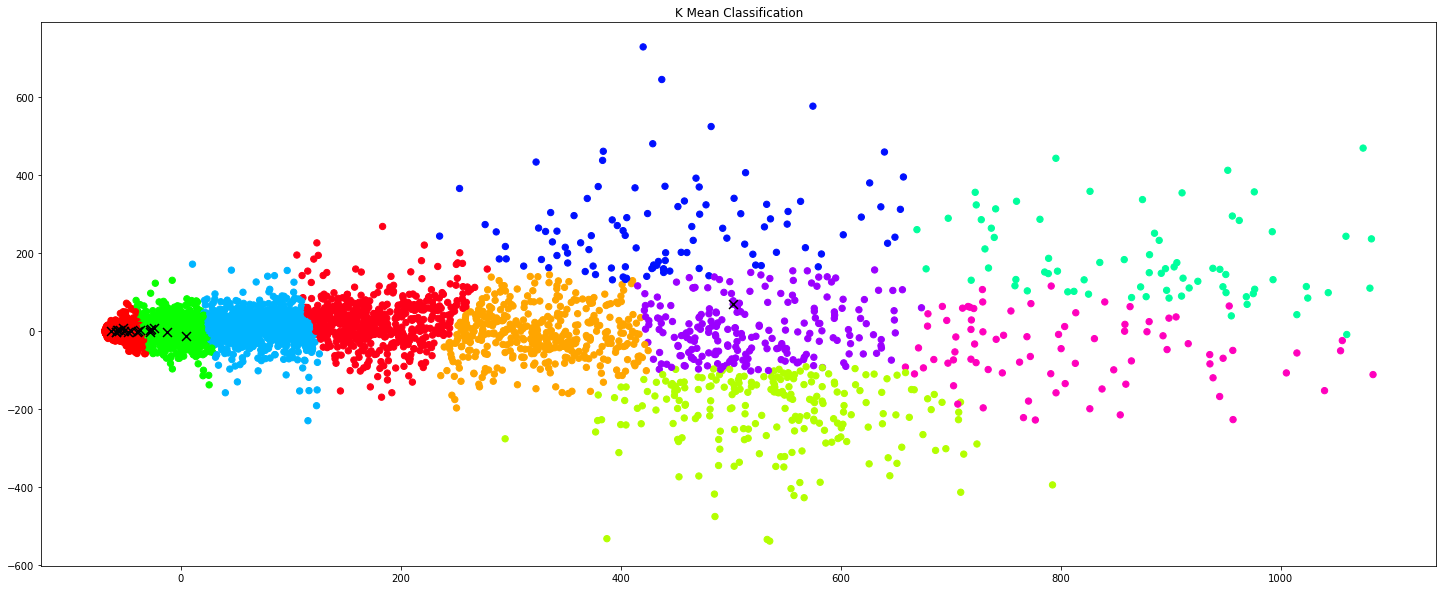

In [26]:
%matplotlib inline   

'''
for i in range(0,len(featureList)):
	plt.subplot(3,3,i+1)
	plt.hist(formaterCarac(data,i))
	plt.xlabel(featureList[i])


plt.show()
'''

print "taille de mediane: ",len(median),len(moy)
print "mini = ",mini," maxi=",maxi
print "n= ",n,"/",len(tabObj)



model = KMeans(n_clusters=k, random_state=0).fit(data)

'''
for i in range(0,len(model.labels_)):
	print noms[i],model.labels_[i]
	if model.labels_[i] == 5:
		plt.scatter(tab_jjR[i],tab_flux[i])
		plt.show()
'''
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data_PCA = pca.transform(data)




snPCA0=[]
snPCA1=[]



for i in range(0,len(noms)):
	name= noms[i].split("/")[6].split(".")[0]
	for j in range(0,len(supernovae_liste)):

		if str(name) == str(supernovae_liste[j]):
			tmp = recupererData([noms[i]])
			print "1 SN trouve! ",name,supernovae_liste[j],model.labels_[j]
			#plt.scatter(tmp[0].jjR,tmp[0].fluxR)
			#plt.xlabel("jour julien")
			#plt.ylabel("flux")
			#plt.show()
			snPCA0.append(data_PCA[j, 0])
			snPCA1.append(data_PCA[j, 1])
			#print data_PCA[j, 0],data_PCA[j, 1]




nom_aber=[]
for i in range(0,len(data_PCA[:, 0])):
	if data_PCA[i,0] > 800 or data_PCA[i,0] <-800:
		print data_PCA[i,0]
		nom_aber.append(noms[i])

for i in range(0,len(nom_aber)):
	print nom_aber[i]
	tmp = recupererData([nom_aber[i]])
	#plt.scatter(tmp[0].jjR,tmp[0].fluxR)
	#plt.xlabel("jour julien")
	#plt.ylabel("flux")
	#plt.show()




plt.figure(figsize=(25,10))
colormap = np.array(['red', 'lime', 'black','blue','green','magenta','orange','cyan'])
print model.labels_
print model.cluster_centers_
print "pca : ",  pca.explained_variance_



c_m = []
for i in range(0,k):
    c_m.append(hsv(float(i)/(k-1)))
    
c_m =  np.array(c_m)

plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=c_m[model.labels_], s=40)

#plt.scatter(data_PCA[:, 0], data_PCA[:, 1], s=40)
plt.scatter(snPCA0,snPCA1,c='black',marker="x",s=80)
plt.title('K Mean Classification')
plt.show()




exit(1)




In [30]:

labs = model.labels_
print len(labs)
counter = 0
for l in labs:
    if l == 3:
        counter+=1
        
print counter

17435
2922


array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   6.48530060e-01,   0.00000000e+00,
          1.00000000e+00],
       [  7.02939879e-01,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  3.12493437e-02,   1.00000000e+00,   1.31250131e-06,
          1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   6.17278534e-01,
          1.00000000e+00],
       [  0.00000000e+00,   7.11032029e-01,   1.00000000e+00,
          1.00000000e+00],
       [  0.00000000e+00,   6.25019688e-02,   1.00000000e+00,
          1.00000000e+00],
       [  6.09189879e-01,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   7.42280060e-01,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   9.37500000e-02,
          1.00000000e+00]])

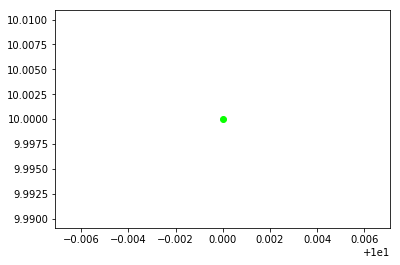

In [34]:
plt.scatter([10],[10], c=[c_m[3]])
c_m

In [8]:
print lc

[[ -7.06077480e+00  -7.27309990e+00  -7.05380678e+00  -6.07816076e+00
   -7.53773975e+00  -7.85753393e+00  -8.53642654e+00  -7.78215694e+00
   -8.01520348e+00  -7.27225065e+00]
 [  5.37690000e+04   5.38480000e+04   5.38510000e+04   5.38750000e+04
    5.38790000e+04   5.38830000e+04   5.38880000e+04   5.39060000e+04
    5.39160000e+04   5.39190000e+04]
 [  1.01826560e+00   1.10348642e+00   8.94981623e-01   1.08525598e+00
    1.14576399e+00   9.47309017e-01   9.77757394e-01   1.02938759e+00
    1.05425632e+00   1.27756453e+00]]


In [9]:
colormap[model.labels_]

IndexError: index 10 is out of bounds for axis 0 with size 8

In [37]:
len(model.labels_)

5268

In [113]:
c_m = []
for i in range(0,k):
    c_m.append(hsv(float(i)/(k-1)))
    
c_m =  np.array(c_m)

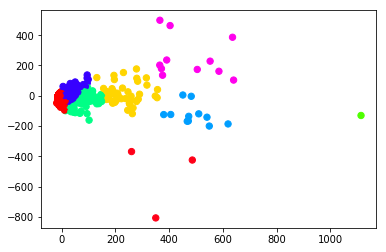

In [114]:

plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=c_m[model.labels_], s=40)



In [112]:
len(mode)

TypeError: only integer arrays with one element can be converted to an index

In [106]:
cmap[model.labels_*0]

array([[0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       ..., 
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

In [95]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("test_map",c_m)

In [96]:
cmap

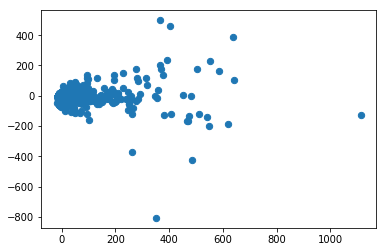

In [99]:
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], cmap=cmap, s=40)


In [93]:
cmap.N

256

In [100]:
c_m

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.83382436323612785, 0.0, 1.0),
 (0.30918948566007398, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.52463196614175589, 1.0),
 (0.0, 0.61838487757605409, 1.0, 1.0),
 (0.21543948566007359, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.92757436323612774, 1.0),
 (1.0, 0.0, 0.09375, 1.0)]